### Imports

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [ ]:
selected_features = pd.read_csv('data/selected_features.csv')

R^2: 0.36165369372685174
Mean Squared Error: 123.86641619111835


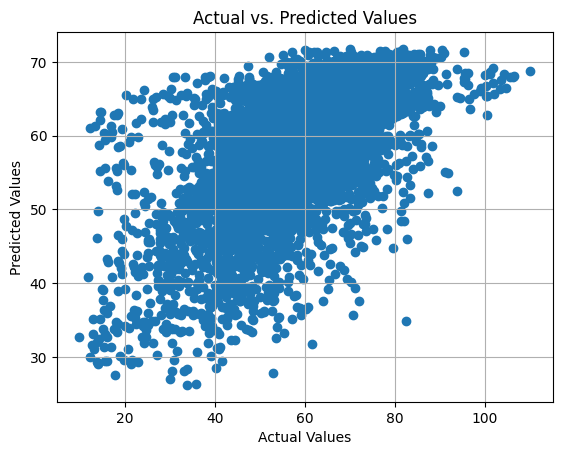

In [12]:
X = selected_features[['generation fossil brown coal/lignite', 'generation hydro pumped storage consumption', 'generation fossil hard coal']]
y = selected_features['price actual']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = LinearRegression()
fit = model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Calculate R^2 and Mean Squared Error
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f'R^2: {r2}')
print(f'Mean Squared Error: {mse}')

# plt.plot(y_test.reset_index(drop=True), label='Actual Values')
# plt.plot(y_pred, label='Predicted Values', linestyle='dashed')
# plt.xlabel('Index')
# plt.ylabel('Values')
# plt.title('Comparison over Time/Index')
# plt.legend()
# plt.grid(True)
# plt.show()

plt.scatter(y_test, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.grid(True)
plt.show()